In [1]:
import pickle
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)
df = pd.read_csv('merge2018-tratado.csv')

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_24464\3282956134.py:16: DtypeWarning: Columns (24,39,76,77,88,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merge2018-tratado.csv')


In [2]:
df.head(2)

,Unnamed: 0,Ano Letivo de Previsão de Conclusão,Ano de Conclusão,Ano de Ingresso,Campus,Cota MEC,Cota Sistec,Código Curso,Data de Conclusão de Curso,Data do Último Procedimento,Deficiência,Descrição do Curso,Estado Civil,Etnia/Raça,Forma de Ingresso,Frequência no Período,I.R.A.,Matriz,Modalidade,Nível de Ensino,Percentual de Progresso,Período Atual,Período Letivo de Integralização,Período de Ingresso,Polo,Renda Per Capita,Sexo,Situação no Curso,Situação no Período,Superdotação,Tipo de Escola de Origem,Transporte Escolar: Poder Público,Transporte Escolar: Tipo de Veículo,Transtorno,Turno,Zona Residencial,Prática Profissional Pendente,Colação de Grau Pendente,Atividades Complementares Pendente,Carga Horária de TCC Pendente,Carga Horária de Prática Profissional Pendente,Registro de TCC Pendente,Carga Horária de Seminário Pendente,Carga Horária Eletiva Pendente,Carga Horária Optativa Pendente,Carga Horária Obrigatória Pendente,Registro do ENADE,Ano/Semestre letivo da ocorrência,Série/Período da ocorrência,Principal motivo da ocorrência_2,Motivo terciário da ocorrência,Motivo secundário da ocorrência,FAIXA_ETARIA,IDADE,COTA,EIXOS,PARTICIPACAO,CAMPUS_INFRA,CAMPUS_LOCALIZACAO,CAMPUS_GESTAO,CAMPUS_DOCENTES,CAMPUS_APOIO_ACAD,CAMPUS_CUSTEIO,CAMPUS_AVALIACAO,CURSO_DOCENTES_COMPETENCIA,CURSO_ENSINO_APRENDIZAGEM,CURSO_HABIL_COMPETE,CURSO_TEORIA,CURSO_PRATICA,CURSO_AVALIACAO,CURSO_VIDA_PROFISSAO,CURSO_LAB,CURSO_PERSPECTIVAS,CURSO_VIDA_QUALIDADE,PRATICA_TIPO_1,PRATICA_TIPO_2,PRATICA_TIPO_3,PRATICA_TIPO_4,PRATICA_REALIZACAO,PRATICA_CONHECIMENTOS,PRATICA_ORIENTACAO,PRATICA_AREA_PROFISSAO,CURSO_PRELECAO,ESCOLARIDADE_FUND_INST,ESCOLARIDADE_NIVEL,ESCOLARIDADE_IF,ESTUDO_CONTINUIDADE,ESTUDO_CURSO_CURTO,CURSO_PAE_ANT,ANO_FORMAÇÃO_ALTA,ESTUDO_CURSO_SUP,ANO_FIM_CURSO_IFRN,ESTUDO_RELACAO,ESCOLARIDADE_NIVEL_STATUS,ESCOLARIDADE_NIVEL_MAX,ESTUDO_INST_TIPO,ESTUDO_INSTITUICAO,TRAB_SITUACAO,ESTUDO_dummie,TRAB_dummie,TRAB_OCUPACAO,TRAB_EXPERIENCIA,TRAB_AREA,TRAB_CAPACITACAO,TRAB_SETOR,TRAB_CARGO,TRAB_CNAE_GRP,TRAB_NJ,TRAB_RENDA_BRUTA,TRAB_CARGA_HORA,TRAB_MODALIDADE,NEM_DESEJO_TRAB,NEM_INTERESSE,NEM_APROVEITAMENTO,NEM_TRAB_CIDADE,NEM_TRAB_RENDA,NEM_TRAB_ESCASSEZ,NEM_TRAB_ATRAENTE,NEM_DESISTIU_AREA,NEM_TRAB_FUTURO,NEM_NIVEL_ABAIXO,NEM_NIVEL_ACIMA,LOCAL_RESIDENCIA,UF_SUAP,UF_ATUAL,LOCAL_CIDADE-SUAP,LOCAL_RN,LOCAL_DESLOC,LOCAL_DESLOC_DIST,LOCAL_UF,LOCAL_UF_CIDADE,LOCAL_PAIS,LOCAL_DESLOC_MOTIVO,PAE_AVALIACAO,PAE_PRELECAO,ASREMT,NECESSIDADE ESPECIAL,QTD FILHOS,ALUNO EXCLUSIVO REDE PUBLICA,ENSINO FUNDAMENTAL CONCLUSAO,ENSINO MEDIO CONCLUSAO,FICOU TEMPO SEM ESTUDAR,TEMPO SEM ESTUDAR,RAZAO AUSENCIA EDUCACIONAL,POSSUI CONHECIMENTO IDIOMAS,IDIOMAS CONHECIDOS,POSSUI CONHECIMENTO INFORMATICA,ESCOLA ENSINO FUNDAMENTAL,ESCOLA ENSINO MEDIO,TRABALHO SITUACAO,RESPONSAVEL FINANCEIRO,RESPONSAVEL FINANCEIR TRABALHO SITUACAO,RESPONSAVEL FINANCEIRO NIVEL ESCOLARIDADE,PAI NIVEL ESCOLARIDADE,MAE NIVEL ESCOLARIDADE,RENDA BRUTA FAMILIAR,COMPANHIA DOMICILIAR,QTD PESSOAS DOMICILIO,TIPO IMOVEL RESIDENCIAL,TIPO AREA RESIDENCIAL,MEIO TRANSPORTE UTILIZADO,CONTRIBUINTES RENDA FAMILIAR,BENEFICIARIO PROGRAMA SOCIAL,TIPO SERVICO SAUDE,FREQUENCIA ACESSO INTERNET,LOCAL ACESSO INTERNET,QUANTIDADE COMPUTADORES,QUANTIDADE NOTEBOOKS,QUANTIDADE NETBOOKS,QUANTIDADE SMARTPHONES,ano_ultimo_procedimento,curso
0,0,2024,NaN,2023,AP,NaN,NaN,8079,NaN,NaN,NaN,"Técnico de Nivel Médio em Agropecuária, na For...",Solteiro,Parda,Ampla Concorrência,81.53,0.00,136 - Técnico Subsequente em Agropecuária (2012),Técnico Subsequente,Médio,NaN,1,NaN,1,NaN,0.17,M,Matriculado,Matriculado,NaN,Pública,NaN,NaN,NaN,Matutino,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46696 entries, 0 to 46695
Columns: 172 entries, Unnamed: 0 to curso
dtypes: float64(25), int64(6), object(141)
memory usage: 61.3+ MB


In [4]:
#a media representa a proporção de valores 1, ou seja, valores ausentes.
df.isnull().mean()

Unnamed: 0                             0.000000
Ano Letivo de Previsão de Conclusão    0.000000
Ano de Conclusão                       0.842128
Ano de Ingresso                        0.000000
Campus                                 0.000000
                                         ...   
QUANTIDADE NOTEBOOKS                   0.567693
QUANTIDADE NETBOOKS                    0.567693
QUANTIDADE SMARTPHONES                 0.567693
ano_ultimo_procedimento                0.852707
curso                                  0.000000
Length: 172, dtype: float64

In [5]:
#seleciona todas as linhas onde a média de valores ausentes é maior que 0 e ordena
df.loc[:, df.isnull().mean() > 0].isnull().mean().sort_values

<bound method Series.sort_values of Ano de Conclusão               0.842128
Cota MEC                       0.996959
Cota Sistec                    0.996959
Data de Conclusão de Curso     0.842128
Data do Último Procedimento    0.852707
                                 ...   
QUANTIDADE COMPUTADORES        0.567693
QUANTIDADE NOTEBOOKS           0.567693
QUANTIDADE NETBOOKS            0.567693
QUANTIDADE SMARTPHONES         0.567693
ano_ultimo_procedimento        0.852707
Length: 153, dtype: float64>

In [6]:
#serializar a informação obtida anteriormente
#obter o index das colunas com pelo menos 17% dos valores ausentes e remover do banco
missing_proporcion = df.loc[:, df.isnull().mean() > 0].isnull().mean().sort_values()
cols_drop = missing_proporcion[missing_proporcion > 0.17].index
df = df.drop(columns=cols_drop)
df.shape

(46696, 30)

In [7]:
#seleciona as colunas do data set com tipo numerico e categorico e as separa
numerical_cols = df.select_dtypes(exclude=['object']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [8]:
numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

<Axes: >

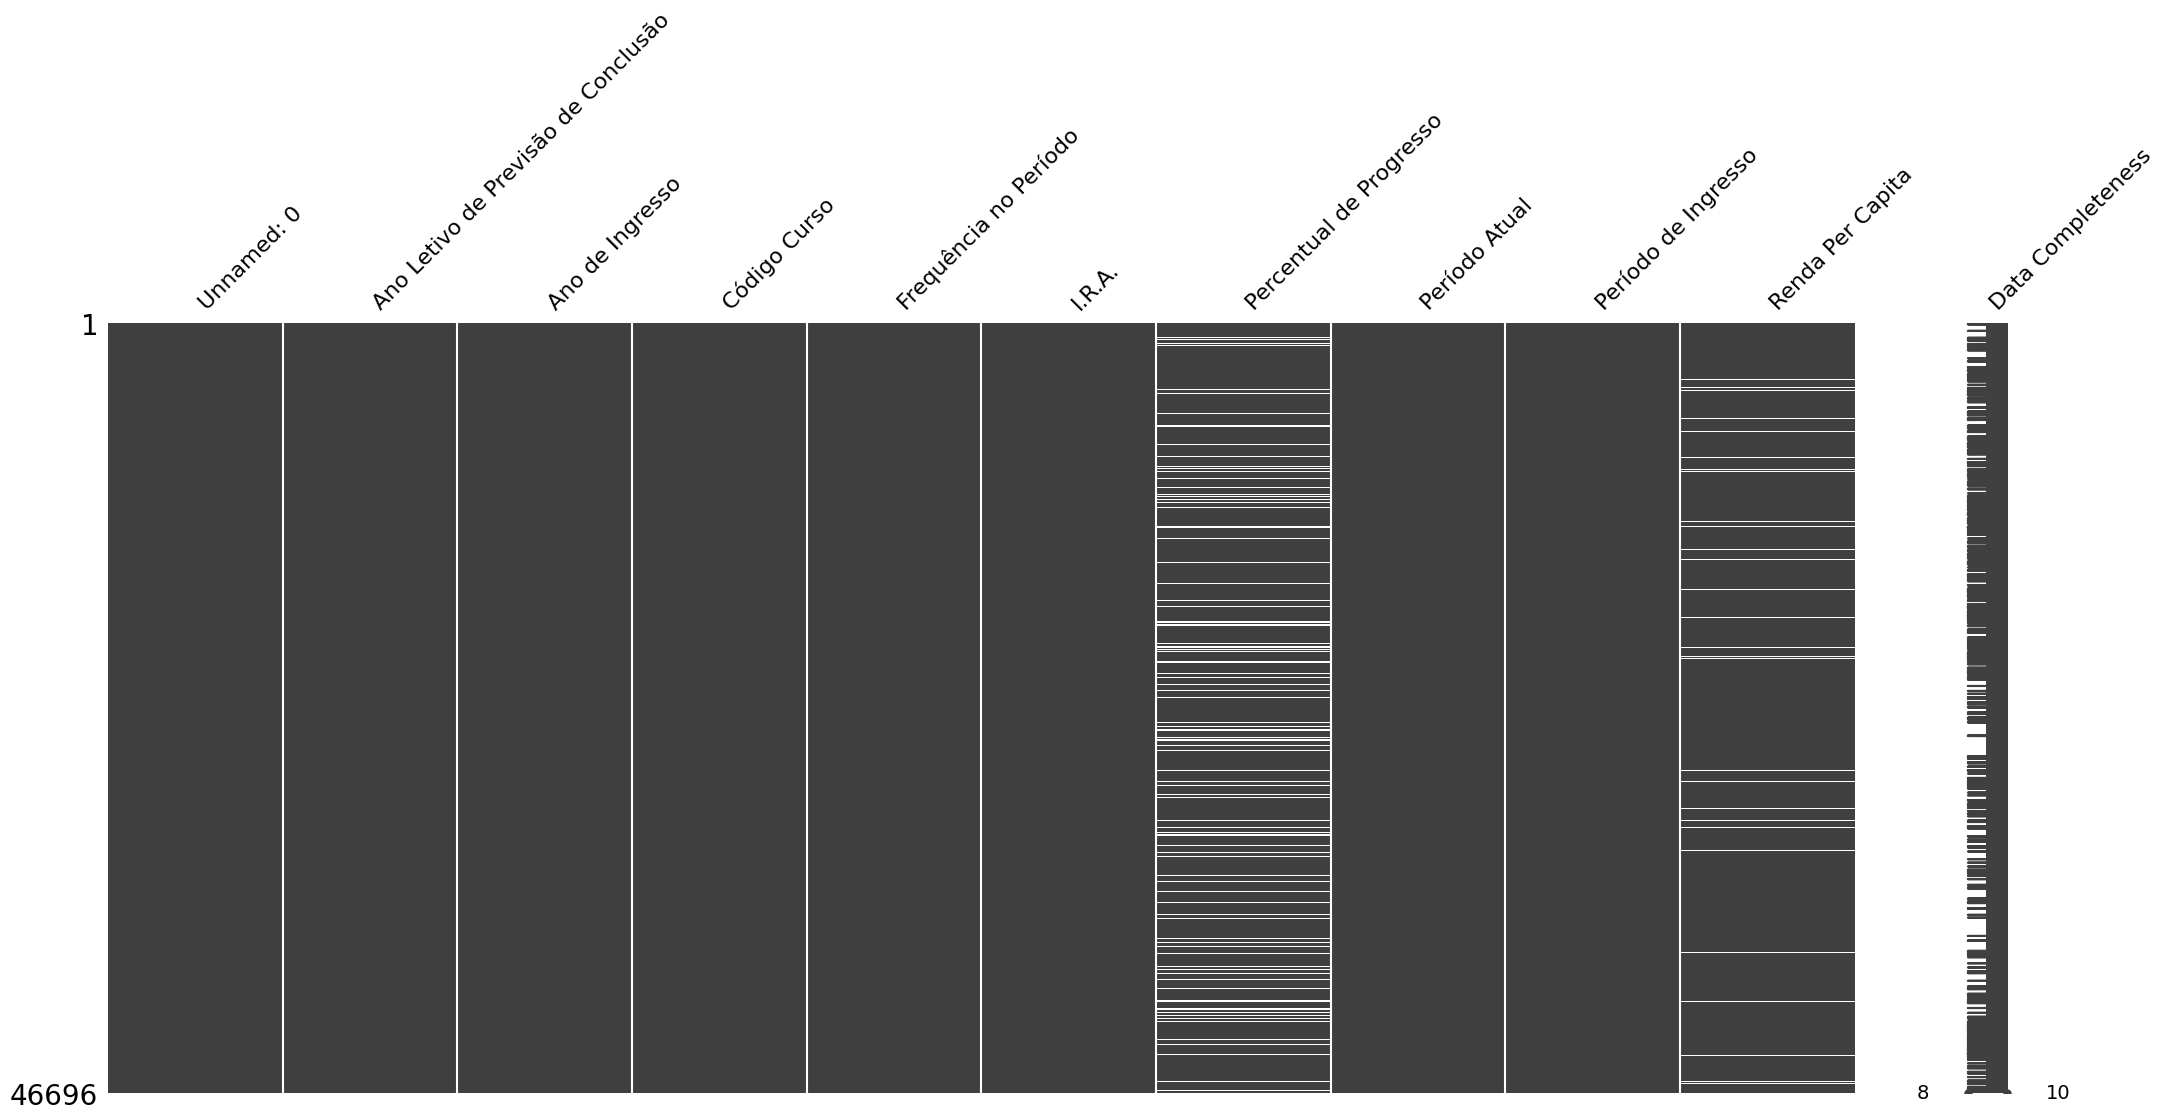

In [9]:
msno.matrix(numerical_df, labels=True)

<Axes: >

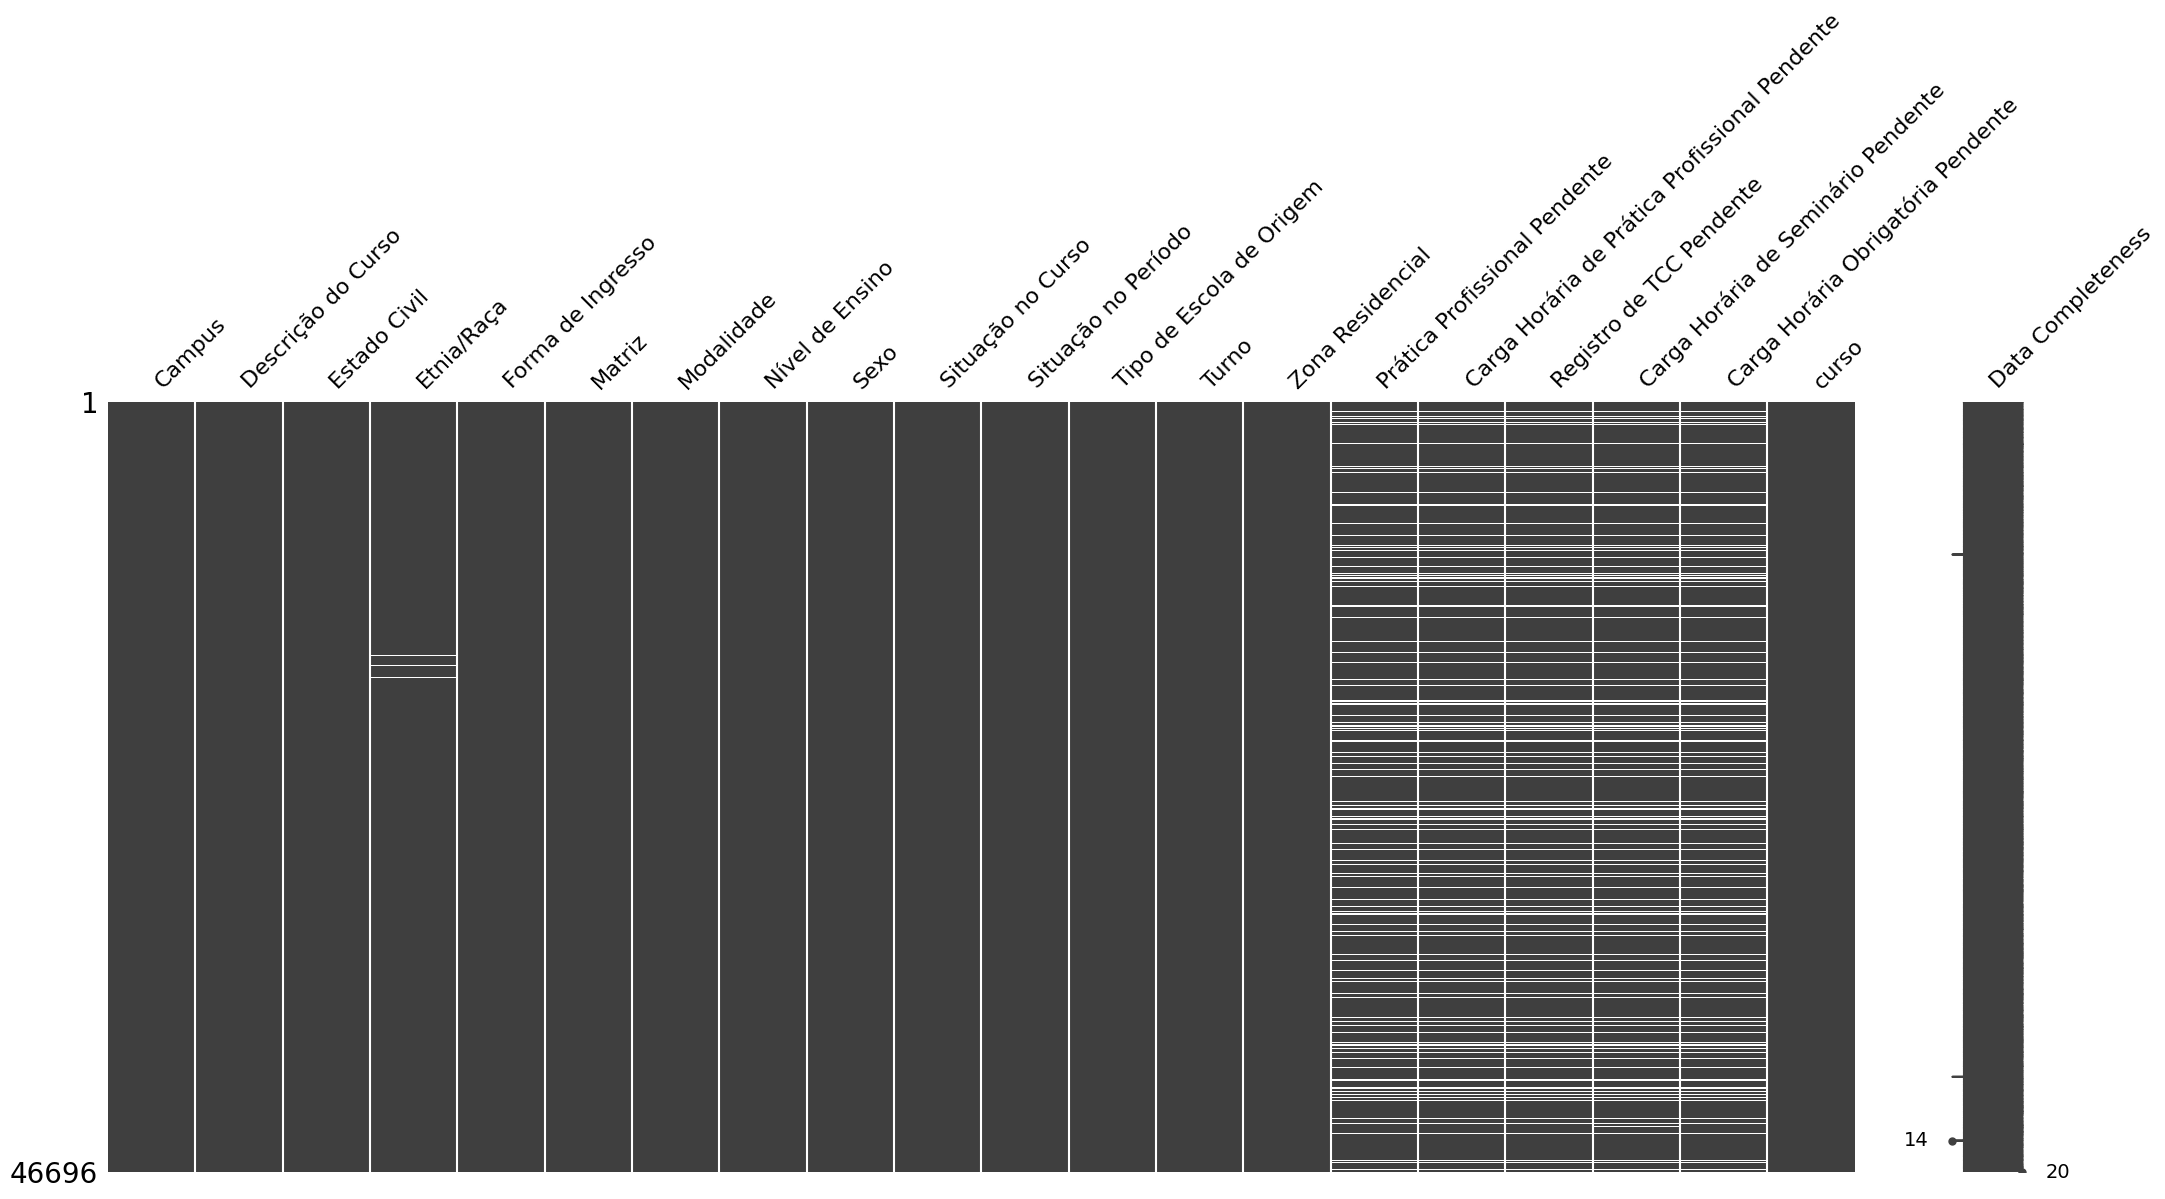

In [10]:
msno.matrix(categorical_df, labels=True)

In [11]:
df['Situação no Curso'].value_counts()

Situação no Curso
Matriculado                        22478
Evasão                             11109
Concluído                           6742
Cancelado                           3563
Formado                              630
Transferido Interno                  539
Trancado Voluntariamente             330
Jubilado                             329
Matrícula Vínculo Institucional      295
Transferido Externo                  282
Cancelamento Compulsório             255
Trancado                              58
Cancelamento por Duplicidade          44
Cancelamento por Desligamento         31
Integralizado Fase Escolar             6
Intercâmbio                            5
Name: count, dtype: int64

(0, 30)

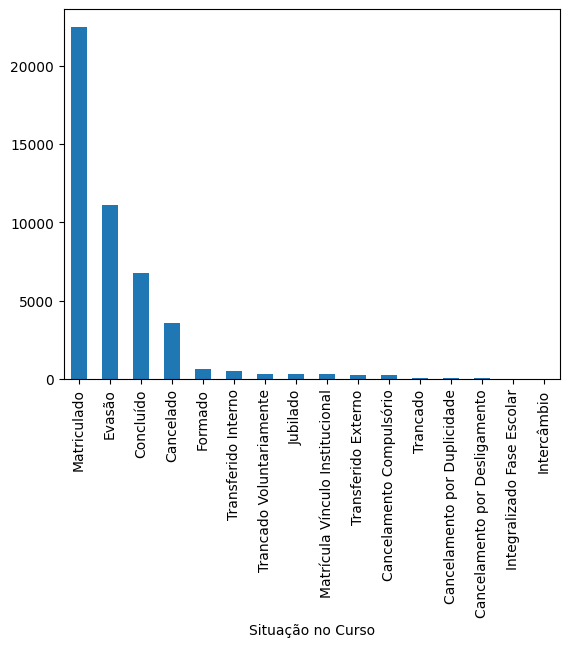

In [12]:
df['Situação no Curso'].value_counts().plot(kind='bar')
df[df['Situação no Curso'].isnull()].shape

(0, 31)

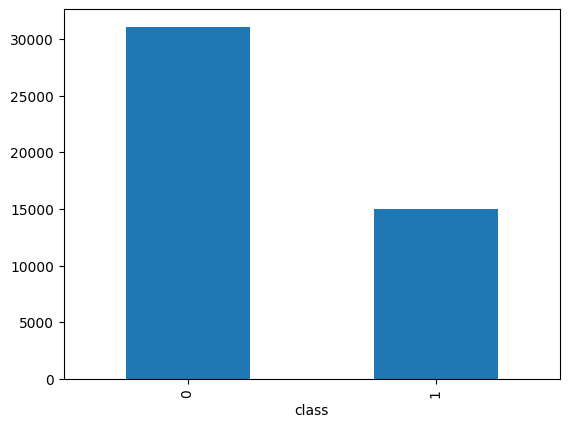

In [13]:
df = df[ df['Situação no Curso'].isin(['Evasão', 'Matriculado', 'Concluído', 'Cancelado', 'Formado', 'Jubilado', 'Trancado Voluntariamente', 'Trancado', 'Cancelamento por Desligamento', 'Transferido Interno', 'Transferido Externo', 'Intercâmbio'])]
df['class'] = df['Situação no Curso'].apply(lambda x:1 if x in ['Evasão', 'Cancelado', 'Jubilado', 'Cancelamento por Desligamento'] else 0)
df['class'].value_counts().plot(kind='bar')
df[df['class'].isnull()].shape

In [14]:
df.head(2)

,Unnamed: 0,Ano Letivo de Previsão de Conclusão,Ano de Ingresso,Campus,Código Curso,Descrição do Curso,Estado Civil,Etnia/Raça,Forma de Ingresso,Frequência no Período,I.R.A.,Matriz,Modalidade,Nível de Ensino,Percentual de Progresso,Período Atual,Período de Ingresso,Renda Per Capita,Sexo,Situação no Curso,Situação no Período,Tipo de Escola de Origem,Turno,Zona Residencial,Prática Profissional Pendente,Carga Horária de Prática Profissional Pendente,Registro de TCC Pendente,Carga Horária de Seminário Pendente,Carga Horária Obrigatória Pendente,curso,class
0,0,2024,2023,AP,8079,"Técnico de Nivel Médio em Agropecuária, na For...",Solteiro,Parda,Ampla Concorrência,81.53,0.00,136 - Técnico Subsequente em Agropecuária (2012),Técnico Subsequente,Médio,NaN,1,1,0.17,M,Matriculado,Matriculado,Pública,Matutino,Urbana,NaN,NaN,NaN,NaN,NaN,Técnico em Agropecuária,0
1,1,2021,2018,AP,8401,"Técnico de Nivel Médio em Informática, na Form...",Solteiro,Branca,Ampla Concorrência,99.36,83.36,106 - Técnico Integrado em Informática (2012),Técnico Integrado,Médio,100.0,4,1,0.61,M,Concluído,Aprovado,Privada,Vespertino,Urbana,Não,Não,Não,Não,Não,Técnico em Informática,0


In [15]:
x = df.drop(['class'], axis=1)
y = df['class']
print(y.value_counts())

class
0    31064
1    15032
Name: count, dtype: int64


<Axes: >

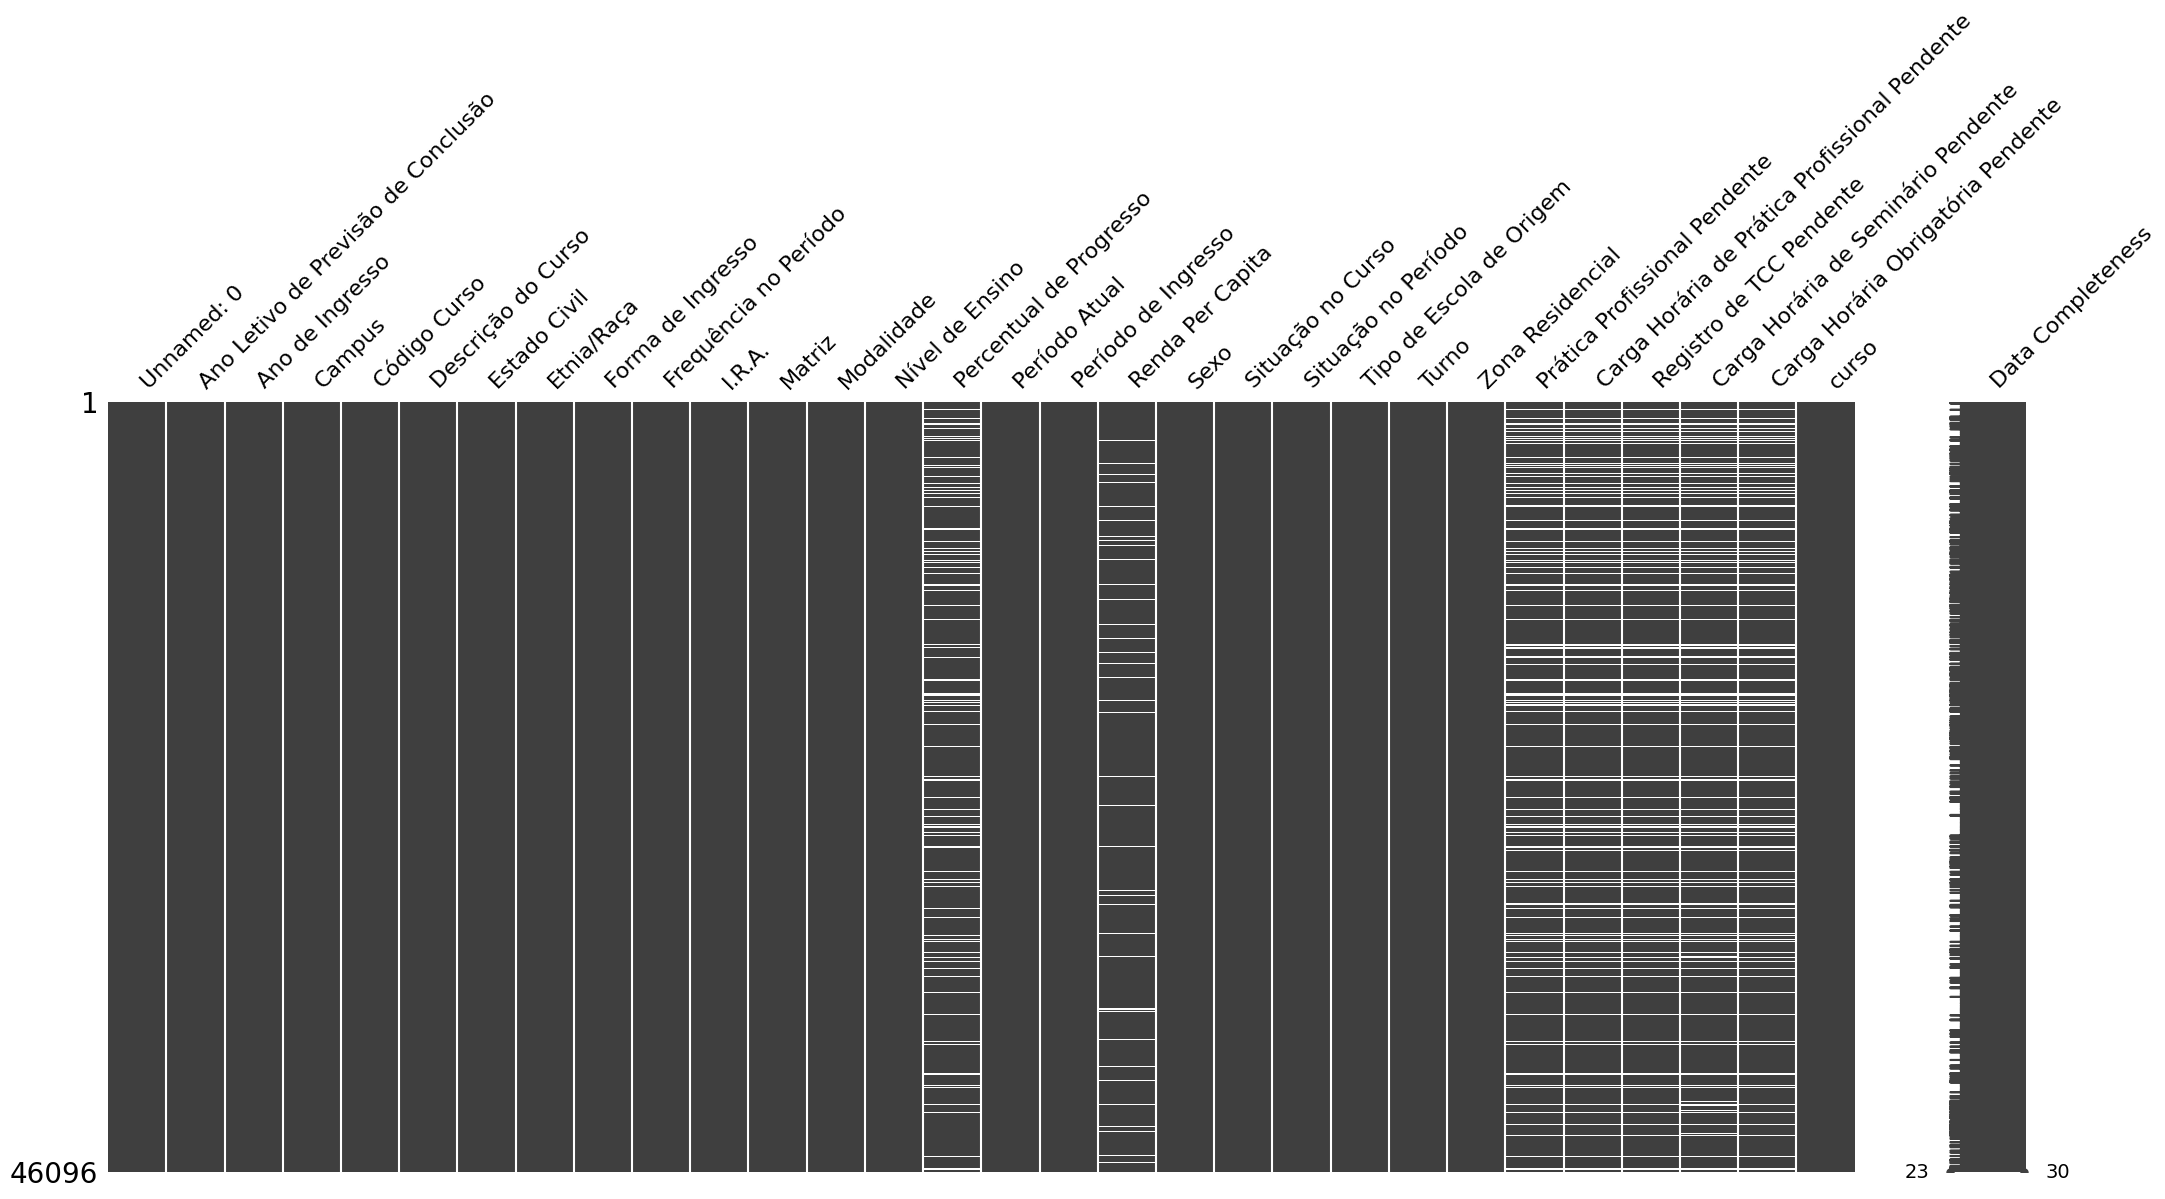

In [16]:
msno.matrix(x, labels=True)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((32267, 30), (13829, 30), (32267,), (13829,))

In [18]:
#imputar missing, tratar e padronizar variaveis categoricas somente após definir treino e teste.
#os nomes nos pipelines e columnsTransformer são para facilitar a busca de erros

#imputa os valores missing nas variaveis numericas com a mediana
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

#imputa os valores missing das variaveis categoricas com o valor mais frequente
#aplica o OneHotEncoder transformado as variaveies em dummies
categorical_transformer = Pipeline(steps=[
    ("imputer2", SimpleImputer(strategy='most_frequent')),
    ("enclude", OneHotEncoder(handle_unknown='ignore'))
])

#no columnsTransformer passamos um nome, o passo que queremos aplicar, nesse caso o que foi feito anteriormente pelo pipeline e as colunas que desejamos aplicar os passos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [19]:
#utilizamos fit apenas no treino
#imputa e transforma os dados do treino
x_train_transformed = preprocessor.fit_transform(x_train)

#imputa e transforma os dados de teste
x_test_transformed = preprocessor.transform(x_test)

import pandas as pd
from sklearn.utils import resample

# Supondo que df é seu dataframe original
df_minority = df[df['class'] == 1]
df_majority = df[df['class'] == 0]

# Upsample a classe minoritária
df_minority_upsampled = resample(df_minority, 
                                  replace=True,     # amostragem com reposição
                                  n_samples=len(df_majority),  # igualar ao número da classe majoritária
                                  random_state=42) # resultados reprodutíveis

# Juntar o conjunto de dados de volta
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Verificar a nova distribuição
print(df_upsampled['class'].value_counts())

# Atualizando x e y com os dados balanceados
y = df_upsampled['class']
x = df_upsampled.drop(columns=['class'])

class
0    31064
1    31064
Name: count, dtype: int64


In [20]:
print(y.value_counts()) 

class
0    31064
1    31064
Name: count, dtype: int64


In [21]:
#criamos o modelo e treinamos
rf = RandomForestClassifier()
rf.fit(x_train_transformed, y_train)

RandomForestClassifier()

In [22]:
y_pred = rf.predict(x_test_transformed)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9319    0]
 [   0 4510]]


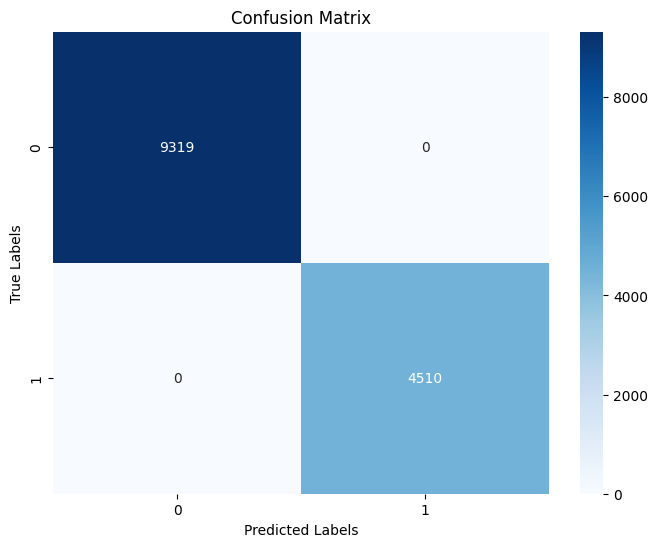

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 1.00


In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9319
           1       1.00      1.00      1.00      4510

    accuracy                           1.00     13829
   macro avg       1.00      1.00      1.00     13829
weighted avg       1.00      1.00      1.00     13829



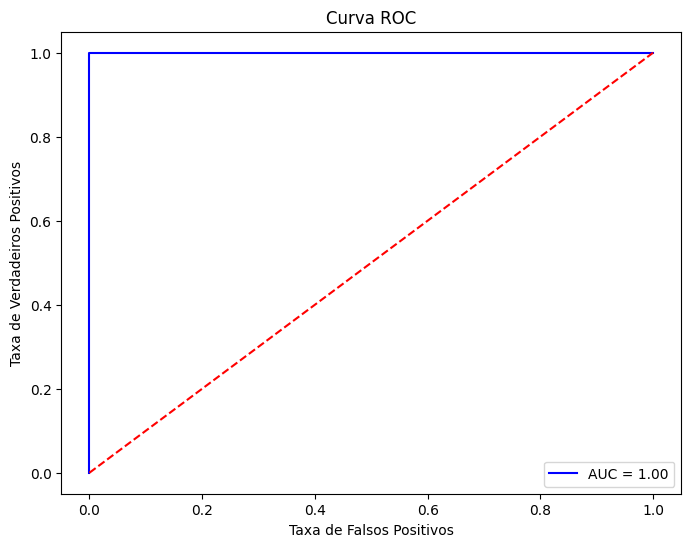

In [27]:
from sklearn.metrics import roc_curve, auc

y_proba = rf.predict_proba(x_test_transformed)[:, 1]  # Probabilidades para a classe positiva
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [28]:
#cria um arquivo para armazenar o modelo criado, em formato binario
rf_picle = open('modelo_pred.pickle', 'wb')

#serializa o objeto rfc, no caso o modelo criado, paraque possa ser usado posteriormente
pickle.dump(rf, rf_picle)

#fecha o arquivo para garantir que os dados sejam salvos
rf_picle.close()

#obter os valores únicos da variável alvo após o balanceamento
class_uniques = df_upsampled['class'].unique()

#abre um arquivo para salvar os valores únicos da variavel alvo
output_pickle = open('output_class.pickle', 'wb')

#serializa o objeto uniques, que são os valores da variavel alvo, escrevendo-os dentro do arquivo output_pickle
pickle.dump(class_uniques, output_pickle)

#fecha o arquivo garantindo que suas informações serão gravadas no disco
output_pickle.close()